# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        self.X=X
        self.y=y
        self.w=w
        MSE=np.square(X.dot(w)-y).mean()#сначала матричное перемножение,потом вычитаем у, потом возводим в квадрат, потом берем среднее
        return MSE

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        XT=X.transpose()#транспонирование
        Grad=((XT).dot(X.dot(w)-y))*(2/(X.shape[0])) #в последней скобке это множитель 2/l
        return(Grad)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 10000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w1=w_init
    Grad_way=[w_init] #список весов, сюда будем добавлять новые значения на каждом шаге
    for i in range(n_iterations): #для каждой итерации
      gradient=loss.calc_grad(X,y,w1) #считаем градиент с прошлым шагом
      w1=w1-lr*gradient #считаем новый шаг
      Grad_way.append(w1) #добавляем в траекторию спуска новое значение весов
    return Grad_way #возврашаем полную траекторию 

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

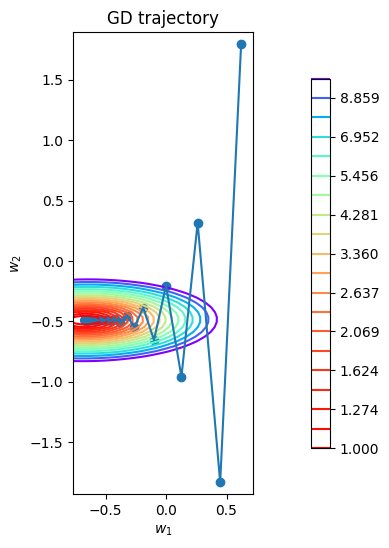

In [ ]:
w_list1 = gradient_descent(w_init, X, y, loss, 0.01, 100)
plot_gd(w_list1,X, y, loss)

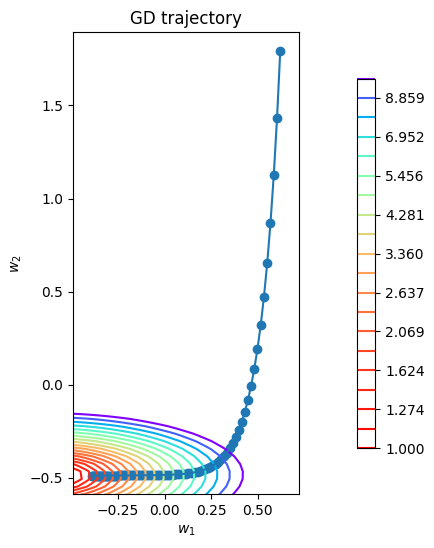

In [ ]:
w_list2 = gradient_descent(w_init, X, y, loss, 0.001, 100)
plot_gd(w_list2,X, y, loss)

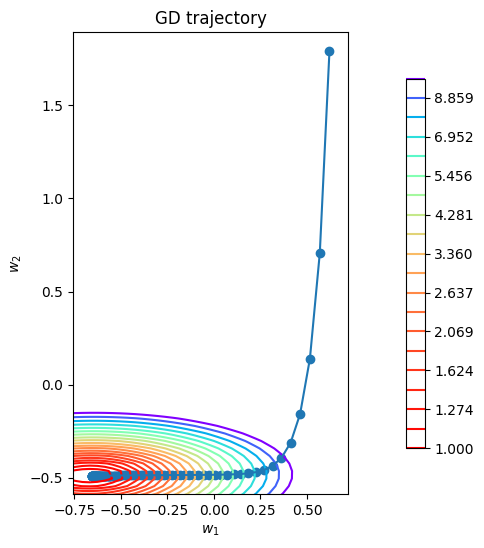

In [ ]:
w_list3 = gradient_descent(w_init, X, y, loss, 0.003, 100)
plot_gd(w_list3,X, y, loss)

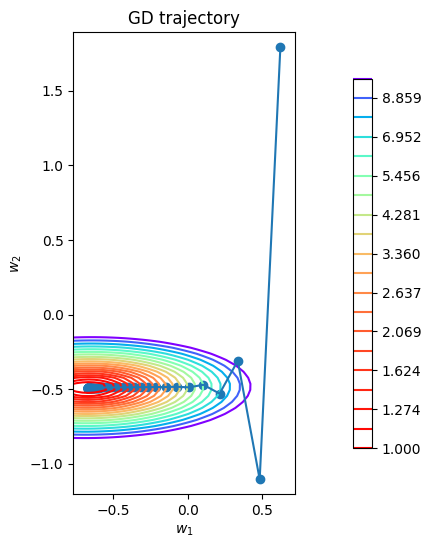

In [ ]:
w_list4 = gradient_descent(w_init, X, y, loss, 0.008, 100)
plot_gd(w_list4,X, y, loss)

#Вывод о влиянии параметра lr на поведение градиентного спуска:
#Когда шаг (lr) большой, то градиентный спуск сходится к минимуму быстрее, например на моих графиках 
#при l=0,008 градиентный спуск уже за 4 шага перешел к линии уровня ~5,5 (голубая линия уровня на графике)
# или при l=0,01 градиентный спуск примерно за 5 шагов пришел к линии уровня ~4,2 (зеленая)
#А если шаг (lr) маленький, то градиентный спуск сходится к минимуму достаточно медленно + не происходят 
#такие резкие скачки ("перескакивание минимума"), как при больших lr
# При lr=0,03, например, градиентный спуск доходит до линии уровня 5,5 и 4,2 за 10-12 итераций, что намного 
#больше (и, получается, медленней) чем при большем шаге
# Или например при l=0,001 градиентный спуск достигает линий уровня 5,5 и 4,2 за 20+ шагов, что еще медленней
# В общем, по графикам можно сказать, что чем больше lr, тем быстрее сходится градиентный спуск к минимуму

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    w1=w_init
    Grad_way=[w_init] #список весов, сюда будем добавлять новые значения на каждом шаге
    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False) #случайные индексы
      batch = X[batch_indices] #выбираем случайную выборку по индексам, найденным выше
      yb=y[batch_indices] #находим эту часть для у
      gradient=loss.calc_grad(batch,yb,w1) #считаем градиент 
      w1=w1-lr*gradient 
      Grad_way.append(w1)
    return Grad_way

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

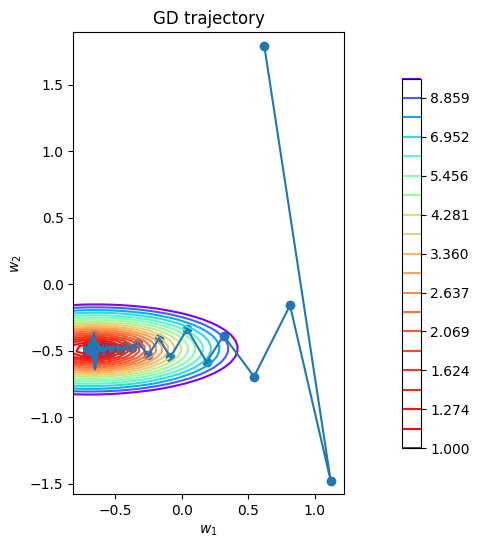

In [ ]:
# -- YOUR CODE HERE --
w_list11 = stochastic_gradient_descent(w_init, X, y, loss, 0.01,25, 100)
plot_gd(w_list11,X, y, loss)

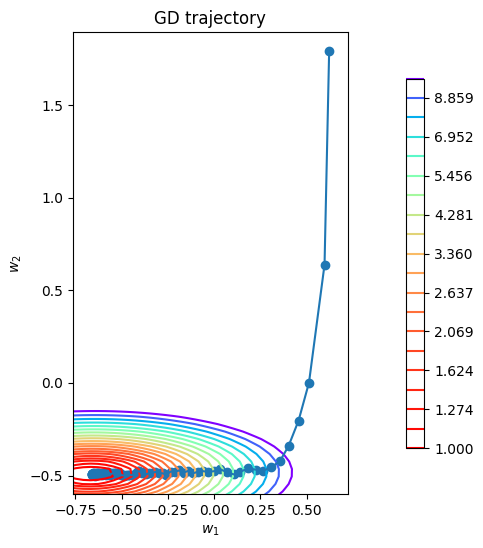

In [ ]:
w_list12 = stochastic_gradient_descent(w_init, X, y, loss, 0.003,100, 100)
plot_gd(w_list12,X, y, loss)

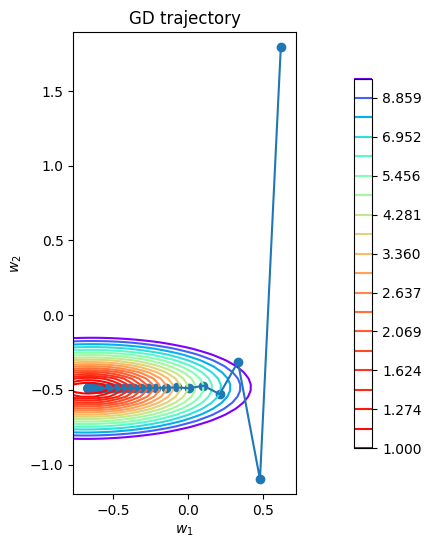

In [ ]:
w_list13 = stochastic_gradient_descent(w_init, X, y, loss, 0.008,299, 100)
plot_gd(w_list13,X, y, loss)

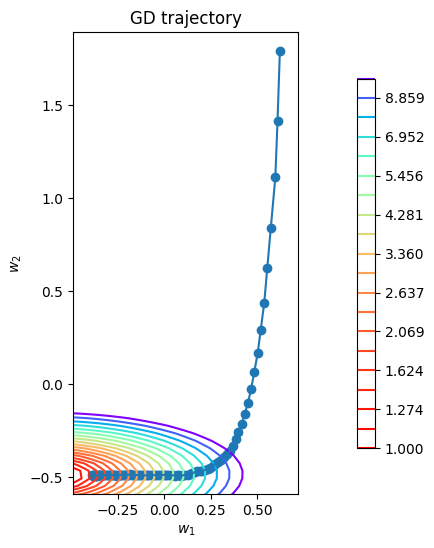

In [ ]:
w_list14 = stochastic_gradient_descent(w_init, X, y, loss, 0.001,179, 100)
plot_gd(w_list14,X, y, loss)

#Выводы о влиянии параметров lr и batch size на поведение стохастического градиентного спуска:
#lr влияет так же, как и в обычном градиентном спуске, то есть влияет на скорость сходимоcти
#То есть в стохастическом градиентном спуске тоже чем больше lr, тем быстрее сходится стохастический 
#градиентный спуск. Например посмотрим на голубую линию уроня, которая составляет примерно 6,9
#При lr=0,01 она достигается примерно на 5 итерации
#При lr=0,008 она достигается примерно на 3 итерации
#При lr=0,003 она достигается примерно на 10-12 итерации
#При lr=0,001 она достигается примерно на 20+ итерации (там точки идут вплотную, сложно точно посчитать)
#Batch size тоже влияет на скорость сходимости, при этом при маленьких значениях Batch size
#сходимость происходит быстрее (если зафиксировать lr и менять batch size), но при этом 
# возникают шумы, то есть, если мы посмотрим на первый график, то заметим, что при очень маленьком batch size
# градиентный спуск очень сильно колеблется, иногда даже перескакивает в сторону градиента, а не антиградиента, а потом обратно
# если batch size большой, то таких колебаний меньше, то есть градиентный спуск реализуется плавно, без скачков
#Поведение стохастического градиентного спуска от обычного отличается тем, что стохастический занимет меньше времени
#для одной итерации и может сходиться быстрее. Но у него очень много шумов, колебаний, в отлчие от обычного градиентного спуска

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w1=w_init
    Grad_way=[w_init] #список весов, сюда будем добавлять новые значения на каждом шаге
    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      yb=y[batch_indices]
      gradient=loss.calc_grad(batch,yb,w1)
      w1=w1-lr*((1/(1+i))**p)*gradient#вычиляем s0/s0+t, возводим в стпень p, а далее как в стохастическом спуске
      Grad_way.append(w1)
    return Grad_way

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

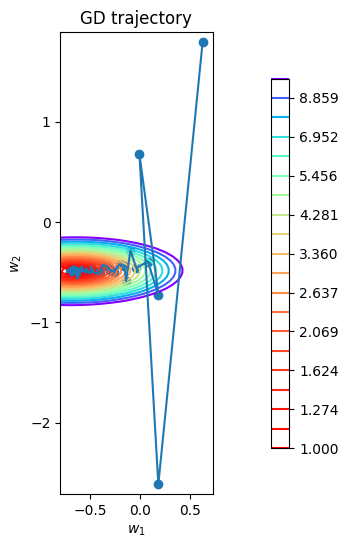

In [ ]:
w_list21 = stochastic_gradient_descent(w_init, X, y, loss, 0.01,10,0.2, 100)
plot_gd(w_list21,X, y, loss)

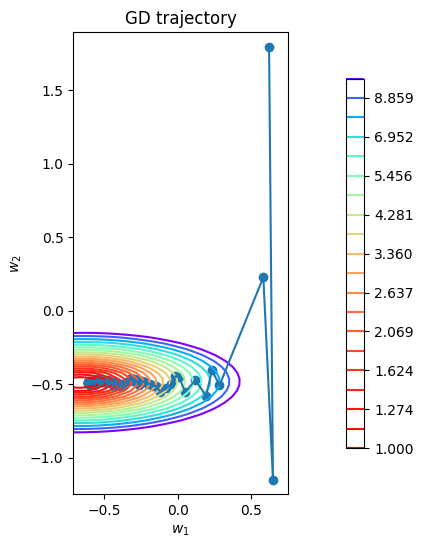

In [ ]:
w_list22 = stochastic_gradient_descent(w_init, X, y, loss, 0.01,10,0.5, 100)
plot_gd(w_list22,X, y, loss)

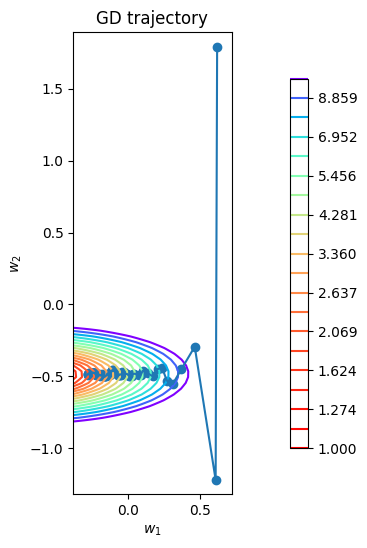

In [ ]:
w_list23 = stochastic_gradient_descent(w_init, X, y, loss, 0.01,10,0.8, 100)
plot_gd(w_list23,X, y, loss)

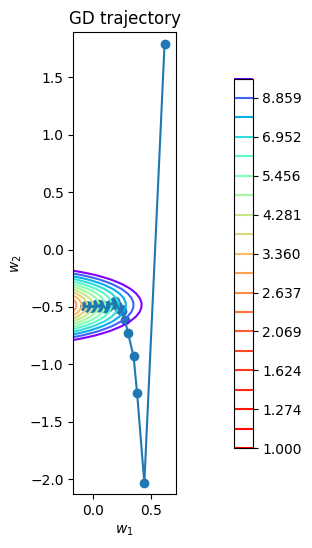

In [ ]:
w_list24 = stochastic_gradient_descent(w_init, X, y, loss, 0.01,10,1, 100)
plot_gd(w_list24,X, y, loss)

#Влияние параметра p на повдение стохастического градиентного спуска:
#чем меньше параметр р, тем меньше шумов и колебаний
# Например если мы посмотрим на первый график, то там р=0,2 и очень резкие колебания на разные линии уровня
#или если на последний, где р=1, то там толко одно колебание вниз, а потом плавный градиентый спуск до точки минимума
#Если посмотреть на все графики с первого до последнего, то я там постепенно увеличивала p
#И можно заметить, что с таким увеличением количество скачков и колебаний становилось меньше

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

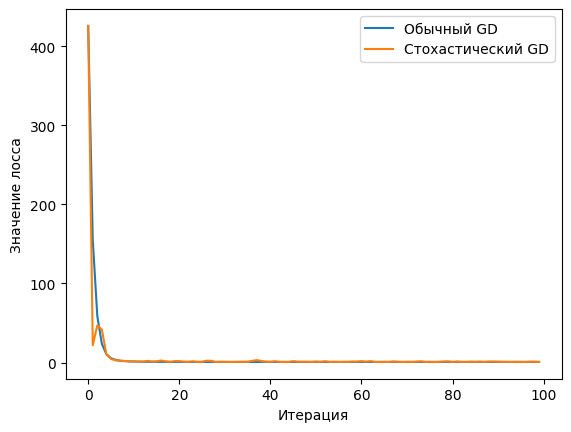

In [ ]:
# -- YOUR CODE HERE --
Number_of_iterations=list(range(0,100))
loss=MSELoss()
W_ord_grad= gradient_descent(w_init, X,y,loss,0.01,100)
W_stoc_grad=stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0,100)
Loss_ord_grad=[]
Loss_stoc_grad=[]
for x in range (100):
    Loss_ord_grad+=[loss.calc_loss(X,y, W_ord_grad[x])]
    Loss_stoc_grad+= [loss.calc_loss(X,y, W_stoc_grad[x])]
plt.plot (Number_of_iterations,Loss_ord_grad, label = 'Обычный GD')
plt.plot (Number_of_iterations,Loss_stoc_grad , label = 'Стохастический GD')
plt.legend()
plt.xlabel('Итерация')
plt.ylabel('Значение лосса')
plt.show()


#Иногда стохастический сходится быстрее, то есть при меньшем количестве итераций он уже достигает минимальной ошибки
#Но иногда и обычный GD сходится быстрее, в то время как в начале стохастический GD колеблется очень сильно
#Но это не всегда так, иногда стохастический GD очень нестабильный и там ошибка перескакивает с минимальной на более высокую
#Особенно колебания заметны на начальных итерациях

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
import random

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":

        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_started=np.ones((X.shape[1])) #попробуем начать с весов равных 1
        w_list = gradient_descent(w_started, X, y, self.loss, self.lr, 10000) #находим веса по градиентному спуску
        self.w=w_list[-1]#берем последнее значение
        # -- YOUR CODE HERE --


        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y_predicted=X.dot(self.w)#находим y_pred с весами, полученными при обучении
        return(y_predicted)
        # -- YOUR CODE HERE --

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(8) #зафиксировали
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3) #разделили выборку на тренирвочную и тестовую

In [ ]:
from sklearn. impute import SimpleImputer
#заполним пропуски в вещественных признаках на train
cat_features_mask = (X_train.dtypes=="object").values #маска для категориалтных
X_real_train = X_train[X_train.columns[~cat_features_mask]] #находим вещественные
X_real_train.columns = X_real_train.columns.astype(str)
mis_replacer = SimpleImputer (strategy="mean" ) #будем заполнять средним
X_no_mis_real_train = pd.DataFrame(
data=mis_replacer.fit_transform(X_real_train), columns=X_real_train.columns)#нормализовали данные
#заполним пропуски в категориальных на train
X_cat_train = X_train[X_train.columns[cat_features_mask]].fillna("")#примениои маску, заполнили
X_cat_train.reset_index(drop= True , inplace= True )#сбросили индексы
X_no_mis_train = pd.concat([X_no_mis_real_train, X_cat_train], axis=1)#объединили все в один дф
X_no_mis_train.columns = X_no_mis_train.columns.astype(str)

#то же самое на вещественных на test
cat_features_mask2 = (X_test.dtypes=="object"). values
X_real_test = X_test[X_test.columns[~cat_features_mask2]]
X_real_test.columns = X_real_test.columns.astype(str)
mis_replacer = SimpleImputer (strategy="mean")
X_no_mis_real_test = pd.DataFrame(
data=mis_replacer.fit_transform(X_real_test), columns=X_real_test.columns)
#то же самое на категориальных на test
X_cat_test = X_test[X_test.columns[cat_features_mask2]].fillna('')
X_cat_test.reset_index(drop= True , inplace= True )
X_no_mis_test = pd.concat ([X_no_mis_real_test, X_cat_test], axis=1)
X_no_mis_test.columns = X_no_mis_test.columns.astype(str)
print(X_no_mis_train.isnull().sum().sum())# проверили,что нет пропусков на тренировочной выборке
print(X_no_mis_test.isnull().sum().sum()) #проверили, что нет пропусков на тестовой выборке

0
0


In [ ]:
#Выполним нормализацию для train
from sklearn.preprocessing import StandardScaler
cat_features_mask3 = (X_no_mis_train.dtypes=="object").values #маска для категориальных признаков
X_real_train2=X_no_mis_train[X_no_mis_train.columns[~cat_features_mask3]]#находим вещественные
scaler = StandardScaler()#нормализатор
X_real_train3=scaler.fit_transform(X_real_train2)#нормализовали данные 
X_real_train3=pd.DataFrame(X_real_train3, columns=X_real_train2.columns)#создали дф с вещественными
X_cat_train3=X_no_mis_train[X_no_mis_train.columns[cat_features_mask3]]#достали категориальные 
X_itog_train=pd.concat ([X_real_train3, X_cat_train3], axis=1)#соединили
# сделаем то же самое для test
cat_features_mask4= (X_no_mis_test.dtypes=="object").values
X_real_test2=X_no_mis_test[X_no_mis_test.columns[~cat_features_mask4]]
scaler = StandardScaler()
X_real_test3=scaler.fit_transform(X_real_test2)
X_real_test3=pd.DataFrame(X_real_test3, columns=X_real_test.columns)
X_cat_test3=X_no_mis_test[X_no_mis_test.columns[cat_features_mask4]]
X_itog_test=pd.concat([X_real_test3, X_cat_test3],axis=1)
X_itog_train.head(5)#смотрим, что все ок

,index,0,1,9,10,11,12,13,16,18,...,2,3,4,5,6,7,8,14,15,17
0,1.237511,0.914824,0.361265,-0.075452,0.161630,-0.156522,-0.774953,0.305305,0.437798,1.028202,...,toyota,gas,std,two,hatchback,rwd,front,ohc,four,mpfi
1,1.535827,0.914824,-0.951380,-0.262264,-0.201908,-0.204367,0.774953,-0.493120,-0.432089,-0.509924,...,volkswagen,gas,std,four,sedan,fwd,front,ohc,four,mpfi
2,0.781262,-0.759364,-0.688851,-0.313213,-0.177672,-0.252213,0.188502,-0.088122,-0.455599,1.028202,...,subaru,gas,turbo,four,sedan,4wd,front,ohcf,four,mpfi
3,-0.306714,1.751917,0.000000,-0.500024,-0.080728,0.178394,-1.528960,0.704518,0.672903,0.920891,...,mitsubishi,gas,turbo,two,hatchback,fwd,front,ohc,four,spdi
4,-0.534838,-1.596457,-0.984196,2.845602,2.294383,2.762036,1.026289,2.341867,1.307685,0.885121,...,mercedes-benz,diesel,turbo,four,sedan,rwd,front,ohc,five,idi


In [ ]:
#Закодируем категориальные признаки для train
X_dum_train=pd.get_dummies(X_itog_train,drop_first=True)
# то же самое для test 
X_dum_test=pd.get_dummies(X_itog_test, drop_first=True)
#получилось, что в test и train нет нескольких значений, поэтому допишем пустые столбцы
Set_missed_train=set(X_dum_test.columns.values)-set(X_dum_train.columns.values) #столбцы, которых нет в train
Missed_columns_train=list(Set_missed_train)
Missed_array_train=pd.DataFrame(np.zeros((X_dum_train.shape[0],len(Missed_columns_train))),columns=Missed_columns_train) #ДФ из пропущенных признаков с 0
X_train=pd.concat([X_dum_train,Missed_array_train],axis=1) #соединили
Set_missed=set(X_dum_train.columns.values)-set(X_dum_test.columns.values)#нашли пропущенные столбцы
Missed_columns=list(Set_missed)
Missed_array=pd.DataFrame(np.zeros((X_dum_test.shape[0], len(Missed_columns))),columns=Missed_columns)#создали ДФ из пропущенных признаков
Columns_of_train=X_train.columns.values#получили порядок столбцов в train
X_dummies_upgraded=pd.concat([X_dum_test,Missed_array],axis=1)#добавили пустые столбцы
X_dum_test=X_dummies_upgraded[list(Columns_of_train)]#упорядочили
X_test=X_dum_test
X_train.head(5)#смотрим, что с размерностью все ОК

,index,0,1,9,10,11,12,13,16,18,...,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi,15_three
0,1.237511,0.914824,0.361265,-0.075452,0.161630,-0.156522,-0.774953,0.305305,0.437798,1.028202,...,0,0,0,0,0,0,1,0,0,0.0
1,1.535827,0.914824,-0.951380,-0.262264,-0.201908,-0.204367,0.774953,-0.493120,-0.432089,-0.509924,...,0,0,0,0,0,0,1,0,0,0.0
2,0.781262,-0.759364,-0.688851,-0.313213,-0.177672,-0.252213,0.188502,-0.088122,-0.455599,1.028202,...,0,0,0,0,0,0,1,0,0,0.0
3,-0.306714,1.751917,0.000000,-0.500024,-0.080728,0.178394,-1.528960,0.704518,0.672903,0.920891,...,0,0,0,0,0,0,0,1,0,0.0
4,-0.534838,-1.596457,-0.984196,2.845602,2.294383,2.762036,1.026289,2.341867,1.307685,0.885121,...,0,0,0,0,1,0,0,0,0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
# -- YOUR CODE HERE --
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error

# -- YOUR CODE HERE --
print("MSE_train: ", mean_squared_error(y_train, linear_regression.predict(X_train)))
print("MSE_test: ", mean_squared_error(y_test, linear_regression.predict(X_test)))

MSE_train:  1933237.7865751595
MSE_test:  7073532.937684731


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        self.X=X
        self.y=y
        self.w=w
        w1=w[:len(w)-1]#берем все до константного признака
        MSEL2=np.square(X.dot(w)-y).mean() + np.square(w1)*self.coef #по формуле
        self.w1=w1
        return MSEL2
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        w2=w
        w2[len(w)-1]=0 #заменили константный признак на 0
        XT=X.transpose() #транспонировали Х
        Grad=((XT).dot(X.dot(w)-y))*(2/(X.shape[0])) + 2*self.coef*w2 #в последней скобке это множитель 2/l

        return Grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.01))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [ ]:
# -- YOUR CODE HERE --
linear_regression.fit(X_train, y_train)
print("MSE_train: ", mean_squared_error(y_train, linear_regression.predict(X_train)))
print("MSE_test: ", mean_squared_error(y_test, linear_regression.predict(X_test)))


MSE_train:  3613673.539261279
MSE_test:  5534119.768165527


#Для train с регрессией без регуляризации модель очень сильно подгонялась под тренировочную выборку, поэтому там ошибка была намного меньше (1933237) на тренировочной выборке,
#чем ошибка на тренировочной выборке для регрессии с регуляризацией, на которой ошибка почти в 2 раза больше на тренировочной выборке (модель меньше подгоняется под train)
#При этом, для тестовой выборки модель с регуляризацией работает лучше. Без регуляризации MSE было около 7 млн, а с регуляризация на 2.5 млн меньше - 5.5 млн
#То есть модель с регуляризацей на тестовой выборке показывает результат лучше, чем модель без регуляризации. Для тренировочной выборки все наоборот, что говорит о переобучении

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        self.X=X
        self.y=y
        self.w=w
        y_pred=X.dot(w)#нашли скалярное произведение
        diff = y - y_pred #разность, то же самое, что Z в формуле
        result = np.zeros_like(y) #сюда запишем итог от функции 
        mask = (diff < self.eps) & (diff > -self.eps) #создали маску для условия с параметром
        result[mask] = diff[mask] ** 2 / 2 #Для значений внутри промежутка -e<z<e применили функцию
        result[~mask] = self.eps * (np.abs(diff[~mask]) - 1 / 2 * self.eps) #применили функцию для остальных значений, не входящих в промежуток
        return result.mean() #вернули среднее

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        Z=np.array(X.dot(w)-y)
        def func_grad_eps(t):
          if self.eps>t and t>-1*self.eps: #создаем функцию, которая работает с переменной t (то же, что и z в нашей формуле)
            return t
          else:
            return self.eps*(t/abs(t))
        Z_new=np.array(list(map(func_grad_eps, Z)))#применяем функцию и возвращаем новый массив
        summa=0 #здесь будем считать сумму
        for p in range (Z_new.shape[0]): #ищем слагаемые xi*zi и суммируем их
            summa+= Z_new[p]*X[p]
        return summa/X.shape[0] #ищем среднее

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
# -- YOUR CODE HERE --
linear_regression = LinearRegression(HuberLoss(1000))

In [ ]:
linear_regression.fit(X_train, y_train)
print("MSE_train: ", mean_squared_error(y_train, linear_regression.predict(X_train)))
print("MSE_test: ", mean_squared_error(y_test, linear_regression.predict(X_test)))


MSE_train:  2787498.200631456
MSE_test:  4187180.0510192937


#Результат на тренировочной выборке с регрессией MSELoss был меньше, 1.9 млн, те модель сильно подгонялась под данные, регрессия с HuberLoss выдает ошибку больше - 2.7 млн
#Это говорит о том, что модель с HuberLoss не так сильно подгоняется под данные на тренировочной выборке
#На тестовой выборке регрессия с HuberLoss дает результат намного лучше, чем регрессия с MSELoss. На MSELoss ошибка на тестовой выборке была около 7млн, а 
# регрессия с HuberLoss дает ошибку 4.1 млн, то есть работает лучше

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# -- YOUR MEME HERE --
#мем 2022

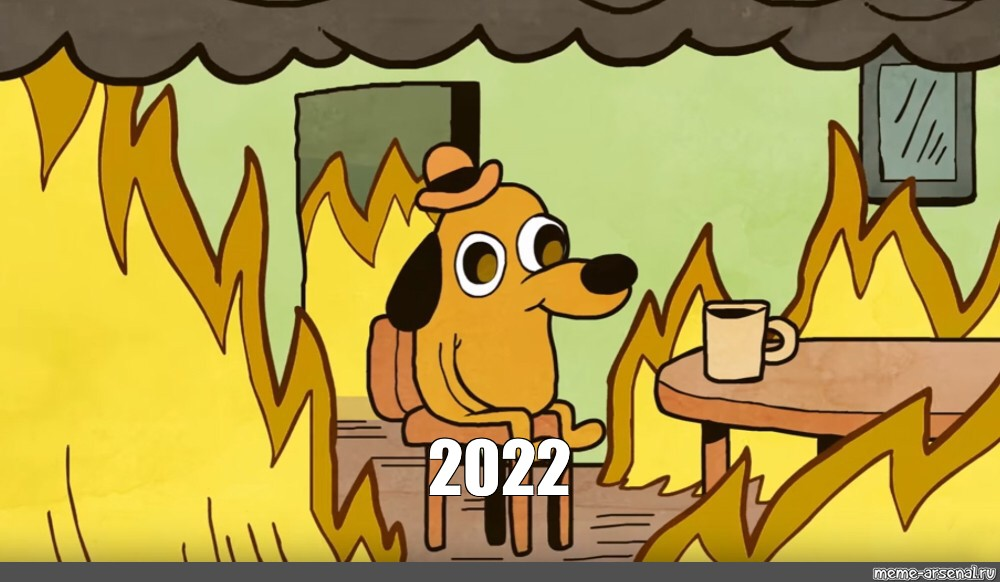

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# Вариант - 1
# Я писала по алгоритму, который описан тут (страницы 134-136): https://www.math.spbu.ru/user/gran/sb1/lopatin.pdf
#Там написано, что если нам изначально веса не подошли, то мы остаемся на итерации k и продолжаем перебор, пока не получим подходящие веса.
# То есть у нас не меняется значение T_k, пока мы не подберем вес. Я сделала это через цикл, прикреплю ниже, но оно очень долго считается, поэтому я 
# написала еще один вариант, который сразу перескакиевает на новое T_k, если веса не подошли, это работает быстрее
# Здесь как раз написан вариант, когда мы перескакиваем на новое T_k в любом случае
import math
def imit_otg_1(w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    n_iterations: int = 10000,
) -> List[np.ndarray]:
    w_first=w_init #cначала мы установили начальные веса, они задаются извне, это наша начальная точка х0
    Weihts_way=[w_first]
    Energy_global_min=loss.calc_loss(X,y,w_first) #Нашли состояние MSE в начальной точке
    old_w=w_first#оставим первые веса, далее будем находить новые
    for k in range(1,n_iterations+1):
      T_k=1/k #"убывающей к нулю положительной последовательности, которая задаёт аналог понижающейся температуры в кристалле" - формулировка со статьи в википедии, прикрепленной к заданию. Если я правильно поняла, я могу сама задать эту последовательность
      new_w = old_w + np.random.standard_t(1, size=old_w.shape) #нашли новые веса
      Energy_candidate=loss.calc_loss(X,y,new_w) #ищем ошибку с новыми весами
      if Energy_candidate<Energy_global_min: #если наша новая ошибка оказалсь меньше чем та, что мы нашли ранее, то
          Energy_global_min=Energy_candidate #перезапишем новое значение ошибки
          Weihts_way.append(new_w) #добавим наши веса в список
          old_w=new_w
      else: #в противном случае
          a=random.random()#генерируем случайное число в интервале от 0 до 1
          diff_E=Energy_candidate-Energy_global_min#нашли E'-E
          M=-diff_E/T_k
          h=pow(2.7, M)#нашли функцию вероятности принятия, у меня выдало ошибку при использовании math.exp(), поэтому я округлила до 2.7
          if a<h:#Если наша вероятность больше рандомного числа, то мы переходим на новые веса
              Energy_global_min=Energy_candidate #перезапишем новое значение ошибки
              Weihts_way.append(new_w) #добавим наши веса в список
              old_w=new_w
    return Weihts_way

In [ ]:
class LinearRegression_bonus:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    #Для первого варианта:
    def fit_1(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":

        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_started=np.ones((X.shape[1])) #попробуем начать с весов равных 1
        w_list = imit_otg_1(w_started, X, y, self.loss) #находим веса 
        self.w=w_list[-1]#берем последнее значение
        # -- YOUR CODE HERE --


        return self

    def predict_1(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y_predicted=X.dot(self.w)#находим y_pred с весами, полученными при обучении
        return(y_predicted)

    #Для второго варианта:
    def fit_2(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":

        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_started=np.ones((X.shape[1])) #попробуем начать с весов равных 1
        w_list = imit_otg_2(w_started, X, y, self.loss) #находим веса 
        self.w=w_list[-1]#берем последнее значение
        # -- YOUR CODE HERE --


        return self

    def predict_2(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y_predicted=X.dot(self.w)#находим y_pred с весами, полученными при обучении
        return(y_predicted)


    #Для третьего варианта:
    def fit_3(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":

        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_started=np.ones((X.shape[1])) #попробуем начать с весов равных 1
        w_list = imit_otg_3(w_started, X, y, self.loss) #находим веса 
        self.w=w_list[-1]#берем последнее значение
        # -- YOUR CODE HERE --


        return self

    def predict_3(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y_predicted=X.dot(self.w)#находим y_pred с весами, полученными при обучении
        return(y_predicted)

In [ ]:
linear_regression_otjig = LinearRegression_bonus(MSELoss())

In [ ]:
linear_regression_otjig.fit_1(X_train, y_train)
print("MSE_train: ", mean_squared_error(y_train, linear_regression_otjig.predict_1(X_train)))
print("MSE_test: ", mean_squared_error(y_test, linear_regression_otjig.predict_1(X_test)))
#Здесь ошибка на тестовой выборке получилась больше, чем при использовании градиента с HuberLoss

MSE_train:  2725520.9245485463
MSE_test:  4876380.709160168


In [ ]:
# Вариант - 2
# Попытаюсь все-таки учесть T_k, но все еще без цикла
# Если кратко, то отличие от предыдущего кода в том, что теперь я считаю T_k как 1/q, где q начинается с 1 и увеличивается только в том случае, когда мы находим "хорошие" веса
# То есть теперь k - это по факту не число итераций, а просто число "попыток перебора". А q как раз становится настоящим числом интераций, то есть количеством "добавления в список новых весов"
#Все остальное осталось таким же, как и в варианте-1
import math
def imit_otg_2(w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    n_iterations: int = 10000,
) -> List[np.ndarray]:
    w_first=w_init #cначала мы установили начальные веса, они задаются извне, это наша начальная точка х0
    Weihts_way=[w_first]
    Energy_global_min=loss.calc_loss(X,y,w_first) #Нашли состояние MSE в начальной точке
    old_w=w_first#оставим первые веса, далее будем находить новые
    for k in range(1,n_iterations+1):
      q=1
      T_k=1/q #"убывающей к нулю положительной последовательности, которая задаёт аналог понижающейся температуры в кристалле" - формулировка со статьи в википедии, прикрепленной к заданию. Если я правильно поняла, я могу сама задать эту последовательность
      new_w = old_w + np.random.standard_t(1, size=old_w.shape) #нашли новые веса
      Energy_candidate=loss.calc_loss(X,y,new_w) #ищем ошибку с новыми весами
      if Energy_candidate<Energy_global_min: #если наша новая ошибка оказалсь меньше чем та, что мы нашли ранее, то
          Energy_global_min=Energy_candidate #перезапишем новое значение ошибки
          Weihts_way.append(new_w) #добавим наши веса в список
          old_w=new_w
          q+=1
      else: #в противном случае
          a=random.random()#генерируем случайное число в интервале от 0 до 1
          diff_E=Energy_candidate-Energy_global_min#нашли E'-E
          M=-diff_E/T_k
          h=pow(2.7, M)#нашли функцию вероятности принятия, у меня выдало ошибку при использовании math.exp(), поэтому я округлила до 2.7
          if a<h:#Если наша вероятность больше рандомного числа, то мы переходим на новые веса
              Energy_global_min=Energy_candidate #перезапишем новое значение ошибки
              Weihts_way.append(new_w) #добавим наши веса в список
              old_w=new_w
              q+=1
    return Weihts_way

In [ ]:
linear_regression_otjig.fit_2(X_train, y_train)
print("MSE_train: ", mean_squared_error(y_train, linear_regression_otjig.predict_2(X_train)))
print("MSE_test: ", mean_squared_error(y_test, linear_regression_otjig.predict_2(X_test)))
#Здесь ошибка на тесте варьируется, иногда меньше, чем у градиентного спуска, иногда больше 

MSE_train:  2283300.2766784206
MSE_test:  3770057.7420983505


In [ ]:
# Вариант-3. Здесь как раз цикл и k меняется только в случае, если мы нашли подходящие веса, иначе все зацикливается и мы перебираем w, пока не найдем подходящие
#Оно очень долго считается, поэтому оставлю небольшое количество интераций - 20
import math
def imit_otg_3(w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    n_iterations: int = 20,
) -> List[np.ndarray]:
    w_first=w_init #cначала мы установили начальные веса, они задаются извне, это наша начальная точка х0
    Weihts_way=[w_first]
    Energy_global_min=loss.calc_loss(X,y,w_first) #Нашли состояние MSE в начальной точке
    old_w=w_first#оставим первые веса, далее будем находить новые
    for k in range(1,n_iterations+1):
      T_k=1/k #"убывающей к нулю положительной последовательности, которая задаёт аналог понижающейся температуры в кристалле" - формулировка со статьи в википедии, прикрепленной к заданию. Если я правильно поняла, я могу сама задать эту последовательность
      new_w = old_w + np.random.standard_t(3, size=old_w.shape) #нашли новые веса
      Energy_candidate=loss.calc_loss(X,y,new_w) #ищем ошибку с новыми весами
      if Energy_candidate<Energy_global_min: #если наша новая ошибка оказалсь меньше чем та, что мы нашли ранее, то
          Energy_global_min=Energy_candidate #перезапишем новое значение ошибки
          Weihts_way.append(new_w) #добавим наши веса в список
      else: #в противном случае
          stop=0#сделаем переменную для остановки цикла
          while stop!=1: 
              a=random.random()#генерируем случайное число в интервале от 0 до 1
              diff_E=Energy_candidate-Energy_global_min#нашли E'-E
              M=-diff_E/T_k
              h=2.7**M
              #math.exp(M)#нашли функцию вероятности принятия
              if a<h:
                Energy_global_min=Energy_candidate #перезапишем новое значение ошибки
                Weihts_way.append(new_w) #добавим наши веса в список
                stop=1
              else:
                new_w = old_w + np.random.standard_t(1, size=old_w.shape) #прошлое значение не подошло -ищем новое
                Energy_candidate=loss.calc_loss(X,y,new_w)
    return Weihts_way

In [ ]:
linear_regression_otjig.fit_3(X_train, y_train)
print("MSE_train: ", mean_squared_error(y_train, linear_regression_otjig.predict_3(X_train)))
print("MSE_test: ", mean_squared_error(y_test, linear_regression_otjig.predict_3(X_test)))
#Здесь ошибка на тестовой выборке намного больше, чем при использовании градиента с HuberLoss, возможно это связано с маленьким количеством итераций

<ipython-input-119-076b091e5c3f>:27: RuntimeWarning: overflow encountered in double_scalars
  h=2.7**M


MSE_train:  67972940.20762324
MSE_test:  55726711.72487451
